# <font color='red'>Heart Failure</font>

![](https://images.squarespace-cdn.com/content/v1/62416ca389785537abb9dea3/600c1c48-8eca-4787-9cc3-c5be0a168709/freedom-from-failure.png?format=2500w)

- This prediction is about a dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- Its contain 11 clinical features for predicting heart disease events.
- The data is from:
    - *Cleveland: 303 observations*
    - *Hungarian: 294 observations*
    - *Switzerland: 123 observations*
    - *Long Beach VA: 200 observations*
    - *Stalog (Heart) Data Set: 270 observations*

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# The amount of unique values in each column

df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

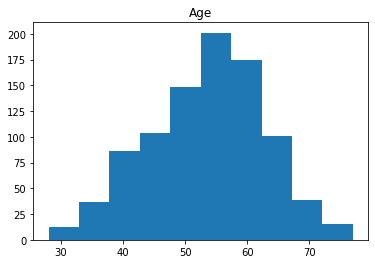

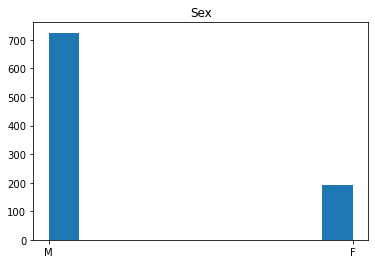

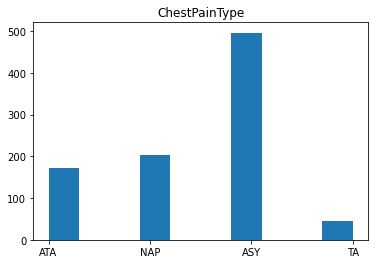

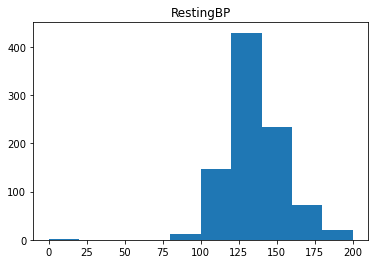

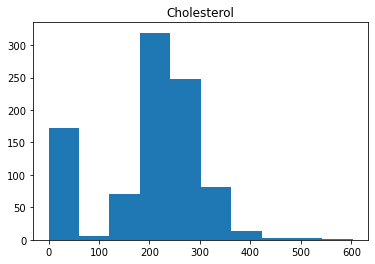

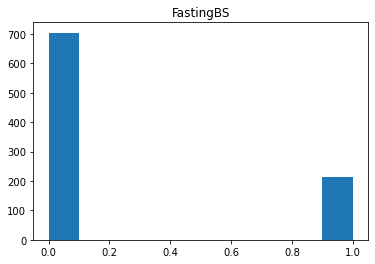

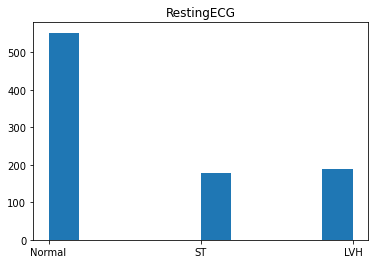

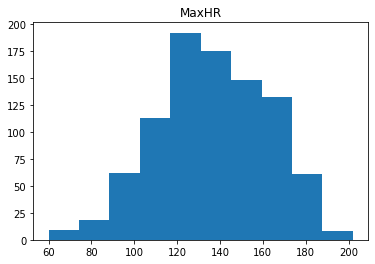

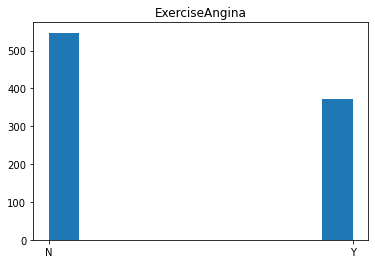

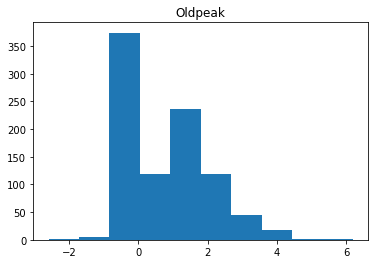

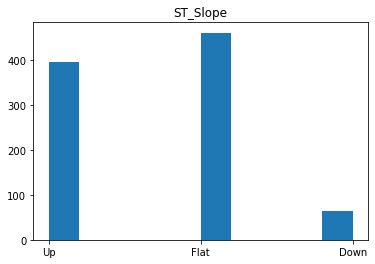

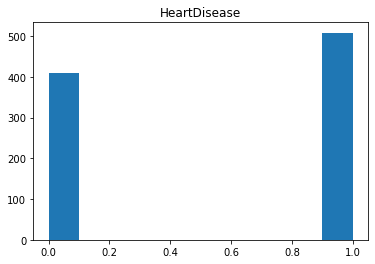

In [6]:
# Checking the histogram for each column

for i in df.columns:
    fig, ax = plt.subplots()
    ax.hist(df[i])
    ax.set_title(i)
    plt.show()

In [7]:
# splitting de unique values with get_dummies

df = pd.get_dummies(df)

In [8]:
# droping 'Sex_M' and 'ExerciseAngina_N' 'cause are inversely proportional with another columns

df.drop(['Sex_M', 'ExerciseAngina_N'], axis=1, inplace=True)

In [9]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [10]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

- Checking the correlation of each column

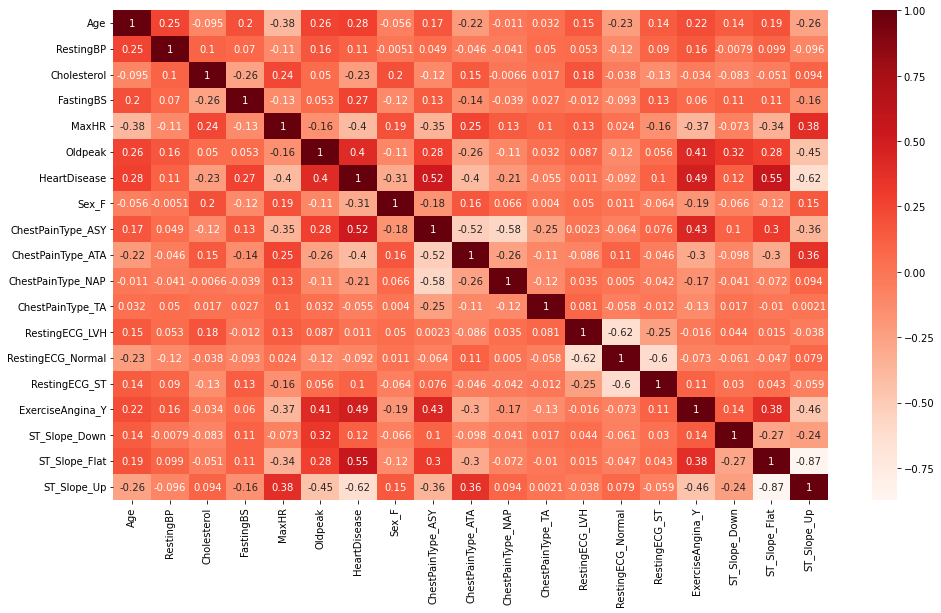

In [11]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds');

### Splitting the data in training and testing

In [12]:
X = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [14]:
df.shape, X_train.shape, X_test.shape

((918, 19), (734, 18), (184, 18))

# Training and testing models
- Training and testing some models to further improve the ones that performed best
- Doing a roc_curve

LogisticRegression
Recall: 0.9313725490196079
AUC: 0.9311334289813487

KNeighborsClassifier
Recall: 0.7254901960784313
AUC: 0.748565279770445

DecisionTreeClassifier
Recall: 0.7745098039215687
AUC: 0.7653036824485892

RandomForestClassifier
Recall: 0.9313725490196079
AUC: 0.9340028694404591

SVC
Recall: 0.7352941176470589
AUC: 0.7989000478240076



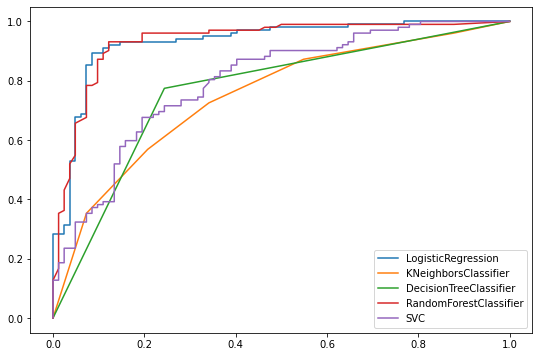

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))

for model in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, SVC]:
    
    if model.__name__ == 'SVC':
        clf = model(probability=True).fit(X_train, y_train)
    else:
        clf = model().fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    
    ax.plot(fpr, tpr, label=model.__name__)
    
    print(model.__name__)
    print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
    print(f'AUC: {metrics.roc_auc_score(y_test, y_proba)}', end='\n\n')
    
ax.legend()
plt.show()

# Logistic Regression

In [16]:
# Separating the hyperparameters to improve the model with GridSearchCV

LR_prms = {
    'penalty': ['l1', 'l2', None],
    'C': [0.1, 0,5, 1, 1,5, 2],
    'solver': ['lbfgs', 'liblinear']
}

In [17]:
# prioritizing recall to hit more true positives (people who have heart failure)

clf_LR = GridSearchCV(LogisticRegression(max_iter=10000), LR_prms, scoring='recall')

In [18]:
clf_LR.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0, 5, 1, 1, 5, 2],
                         'penalty': ['l1', 'l2', None],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='recall')

In [19]:
clf_LR.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [20]:
y_proba_LR = clf_LR.predict_proba(X_test)[:, 1]

In [21]:
y_pred_LR = clf_LR.predict(X_test)

In [22]:
metrics.roc_auc_score(y_test, y_proba_LR)

0.9252749880439981

In [23]:
metrics.recall_score(y_test, y_pred_LR)

0.9313725490196079

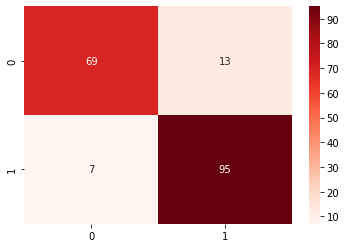

In [24]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_LR), annot=True, cmap='Reds');

# Random Forest

In [25]:
# Separating the hyperparameters to improve the model with GridSearchCV

RF_prms = {
    'n_estimators': [60, 70, 80, 90],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None]
}

In [26]:
clf_RF = GridSearchCV(RandomForestClassifier(), RF_prms, scoring='recall')

In [27]:
clf_RF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [60, 70, 80, 90]},
             scoring='recall')

In [28]:
clf_RF.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 60}

In [29]:
y_proba_RF = clf_RF.predict_proba(X_test)[:, 1]

In [30]:
y_pred_RF = clf_RF.predict(X_test)

In [31]:
metrics.roc_auc_score(y_test, y_proba_RF)

0.9324485891917743

In [32]:
metrics.recall_score(y_test, y_pred_RF)

0.9411764705882353

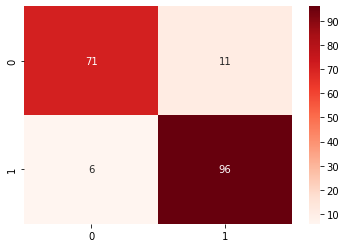

In [33]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred_RF), annot=True, cmap='Reds');

- With a slight superiority of random forest, the models are similar in their test results, both had **+92% AUC and RECALL**